# Hotstar reviews sentimental analysis
-Use hotstar data,predict sentiment score for the reviews column using vader package.
-Convert to labels
   - positive (score > 0.05)
    -negative (score < -0.05)
    -Neutral (-0.05 <= score <= 0.05)
-calculate accuracy score
-Use Naïve Bayes to predict the sentiment using the labelled column Sentiment_Manual
-compare the accuracy with unsupervised models and comment whether supervised or unsupervised gives the best accuracy
-create a multi line chart for comparing no. of positive, negative and neutral reviews for each day (we have one week data)


In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

C:\Users\Administrator\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
hotstar = pd.read_csv("C:/Users/Administrator/UNSTRUCTURE DATA/datasets/hotstar.allreviews_Sentiments.csv")
hotstar.head(10)

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,8/10/2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,8/11/2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,8/12/2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,8/11/2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,8/5/2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral
5,6,BeingUsual,8/7/2017,@hotstartweets Not able 2 watch the latest epi...,@hotstartweets not able 2 watch the latest epi...,Help,Negative,139,Twitter,2017,8,7,Neutral
6,7,yashvi_singh,8/5/2017,Please allow RuPay or Maestro payment gateways...,please allow rupay or maestro payment gateways...,Help,Negative,139,Twitter,2017,8,5,Positive
7,8,bushrareal202,8/7/2017,@hotstar_helps why today s epi of #LoveKaHaiIn...,@hotstar_helps why today s epi of #lovekahaiin...,Help,Negative,138,Twitter,2017,8,7,Positive
8,9,sachinmittal331,8/8/2017,@hotstartweets #HotStarFraud I paid for the su...,@hotstartweets #hotstarfraud i paid for the su...,Help,Negative,138,Twitter,2017,8,8,Positive
9,10,ankush2887,8/5/2017,@hotstartweets i have a premium accnt at hotst...,@hotstartweets i have a premium accnt at hotst...,Help,Negative,138,Twitter,2017,8,5,Neutral


In [3]:
def get_sentiment(text):
    sentiment =SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0.05:
        return 'Positive'
    elif compound < -0.05:
        return 'Negative'
    else:
        return 'Neutral'
hotstar['sentiment_vader'] = hotstar['Reviews'].apply(get_sentiment)

In [4]:
from sklearn.metrics import accuracy_score
accuracy_score(hotstar['Sentiment_Manual'],hotstar['sentiment_vader'])

0.5503661191371463

In [5]:
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer() 
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)

In [6]:
## supervised model
docs = hotstar['Reviews'].str.lower().str.replace('[^a-z ]','')
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean)
df_dtm = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names())

from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm, test_size = 0.2, random_state = 100)
train_y = hotstar.iloc[train_x.index]['Sentiment_Manual']
test_y = hotstar.iloc[test_x.index]['Sentiment_Manual']

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
NB_model = MultinomialNB(alpha=1)
NB_model.fit(train_x,train_y)
NB_predict = NB_model.predict(test_x)
accuracy_score(test_y, NB_predict)



0.7359050445103857

In [7]:
positive = hotstar[hotstar['sentiment_vader']=='Positive'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
negative = hotstar[hotstar['sentiment_vader']=='Negative'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()
neutral = hotstar[hotstar['sentiment_vader']=='Neutral'][['Created_Date','sentiment_vader']].groupby('Created_Date').count().reset_index()

In [8]:
positive.head(1)

,Created_Date,sentiment_vader
0,8/10/2017,526


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

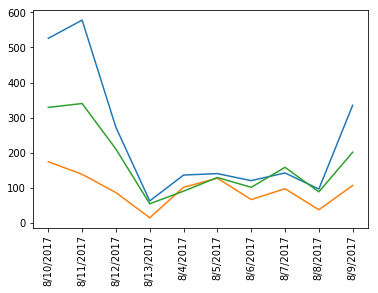

In [9]:
plt.plot(positive['Created_Date'],positive['sentiment_vader'])
plt.plot(negative['Created_Date'],negative['sentiment_vader'])
plt.plot(neutral['Created_Date'],neutral['sentiment_vader'])
plt.xticks(rotation=90)